<a href="https://colab.research.google.com/github/eduardodacostasoares/pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Exploring an example of PyTorch workflow

Resources: https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
tensor_dictionary = {1: "data (prepare and load)",
                     2: "build model",
                     3: "fitting the model to data (training)",
                     4: "making predictions and evaluting a model (inference)",
                     5: "saving and loading a model",
                     6: "putting it all together"}

tensor_dictionary

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn ## nn contains all of PyTorch's building blocks for neural networks.
import matplotlib.pyplot as plt
import numpy as np

#Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning

* Excel speadsheet;
* Images of any kind;
* Videos (Youtube has a lots of data...);
* Audio like songs or podcasts;
* DNA;
* Text.

Machine learning is a game of 2 parts:

1. Get a data into a numerical representation;
2. Build a model to learn patterns in that numerical representation.

Now, let's create some *known* data using linear regression formula:

* The formula for simple linear regression is Y = bX + a, where **Y** is the response (dependent) variable, **X** is the predictor (independent) variable, **b** is the estimated slope, and **a** is the estimated intercept.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
# Create known parameters
weight = 0.7 # equivalent of *b*, in linear regression formula.
bias = 0.3   # equivalent of *a*, in linear regression formula.

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and tests sets (one of the most important concepts in machine learning in general)

Let's create a training and tests set with our data.

In [ ]:
# Create train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in.

"Visualiza, visualize visualize!"

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  # Plot training data in blue

  plt.scatter(train_data, train_labels, c="b", s=12, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=12, label = "Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


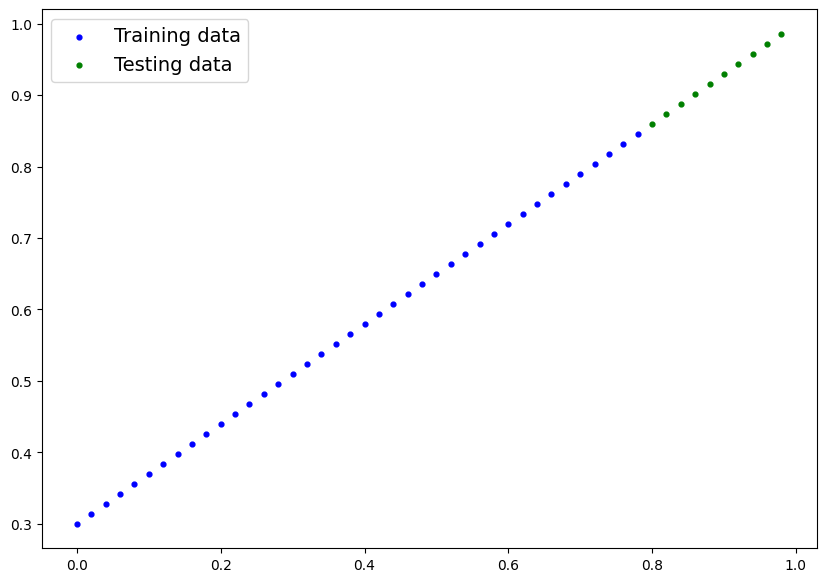

In [ ]:
plot_predictions();

## 2. Building PyTorch model

OOP in Python: https://realpython.com/python3-object-oriented-programming/

What this model does:
* Start with random values (weight and bias)
* Looking at training data and adjust the random values (weights and bias) to better represent (or get closer to)

How does it so?

Through two main algorithms:

1. Gradient descent;
2. Backpropagation.

# Nova seção

In [ ]:
# Creating linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights *  x + self.bias # <- linear regression formula

### PyTorch model building essentials

* **torch.nn** - contains all of the buildings for computational graphs (a neural networks can be considered a computational graph)
* **torch.nn.Parameter** - which parameters should the model try and learn, often a PyTorch layer from torch.nn will set these for use
* **torch.nn.Module** - the base class for all neural networks models, if you subsclass it, you should overwrite forward()
* **torch.optmin** - where the optimizers in PyTorch live, they will help the gradient descent

* **def forward()** - required by all nn.Module subclasses. This method defines what happens in the forward computation

### Checking the contents of the PyTorch model

The model parameters (or Wha's inside our model) can be checked usin `.parameters()`

In [ ]:
# Create a random seed (because weights and bias are created by random values)
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through model, it's going to run it through the `forward()`method.

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

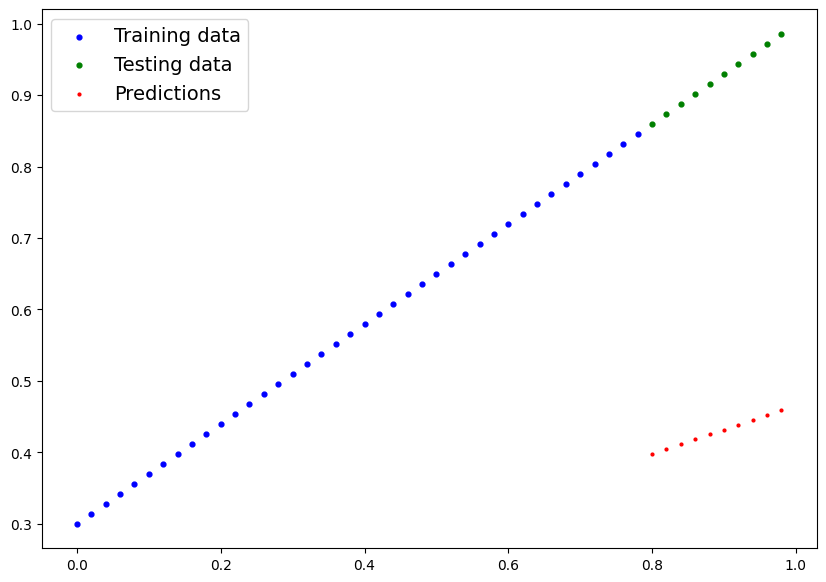

In [ ]:
# Visualizing the predictions

plot_predictions(predictions=y_preds)

## Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words: from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss funtion.

* Note: Loss funtion may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs (lower is better). - https://pytorch.org/docs/stable/nn.html#loss-functions

* **Optimizer:** Takes into account the loss function of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function. - https://pytorch.org/docs/stable/optim.html#module-torch.optim

    * Inside the ioptimizer parameter  you'll often have to set two parameters:
      * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`

      * `lr` (**l**earning **r**ate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr`results in large changes).

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function - https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic Gradient Descent) - https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set (how big of a step will our optimizer change our parameters with every iteration)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) - also called *forward propagation*;
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimazer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data (epoch is an hyper parameter because we've set it ourselves)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

### Training

#0. Pass the data through the model
for epoch in range(epochs):
  # set the model to training mode (this is the default state of a model)
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients.

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop, so we have to zero them above in step 3 for the next iteration of the loop.


### Testing/Evaluating

  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): #turns off gradient tracking and a couple more things behnd the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Printing out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model.state_dict()
    print(model_0.state_dict())

Epoch 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

'test_loss_values'

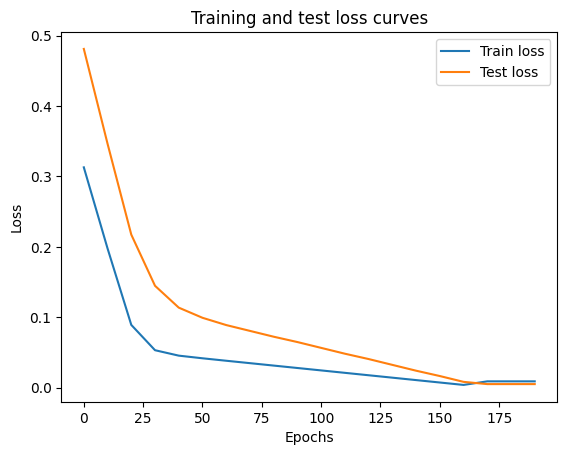

In [ ]:
# Plot the loss curves

plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
# Loss: 0.09681284427642822
# OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3258]))])

model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
weight, bias

(0.7, 0.3)

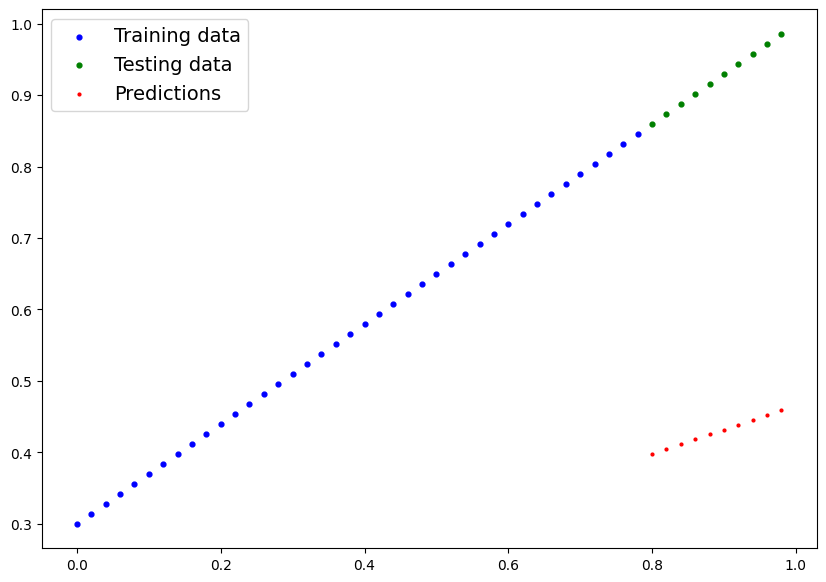

In [ ]:
plot_predictions(predictions=y_preds);

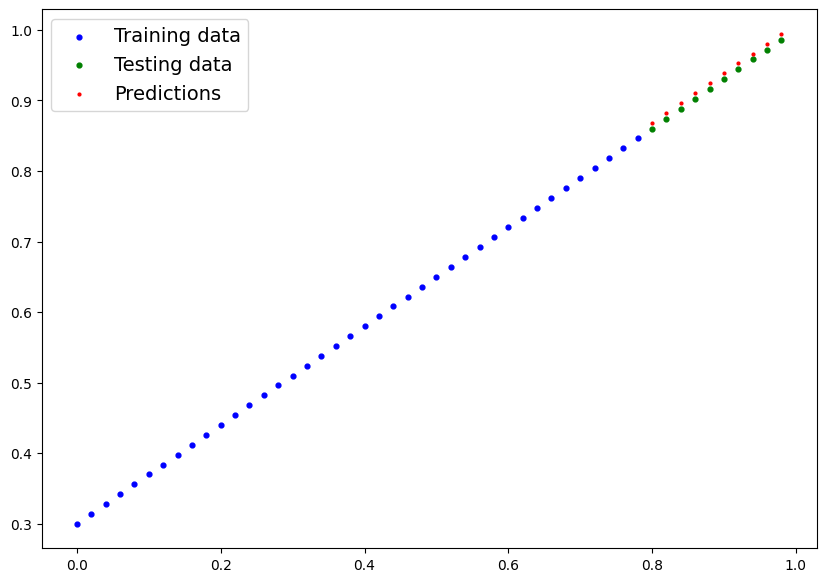

In [ ]:
plot_predictions(predictions=y_preds_new);

## Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch.

1. `torch.save()` - alloes you to save a PyTorch object in Python's pickle format;
2. `torch.load()` - allows you to load a saved PyTorch object;
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.

https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [ ]:
# Save  our PyTorch model

from pathlib import Path

# 1. create a model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_python_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_python_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1674 Nov 24 12:59 01_python_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# TO load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 () (this will update the new instace with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict() #same as "model_0.state_dict()"

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with loaded model

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded_model_preds with original model preds

y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
# Make some models prepended_to_syspath
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together



In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.1.0+cu118'

### 6.0 Create device-agnostic code

This means if we've fot access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU

In [ ]:
# Setup agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [ ]:
# Create some data using linear regression formula of "y = weight * x + bias"

weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1

step = 0.02

# Create x and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

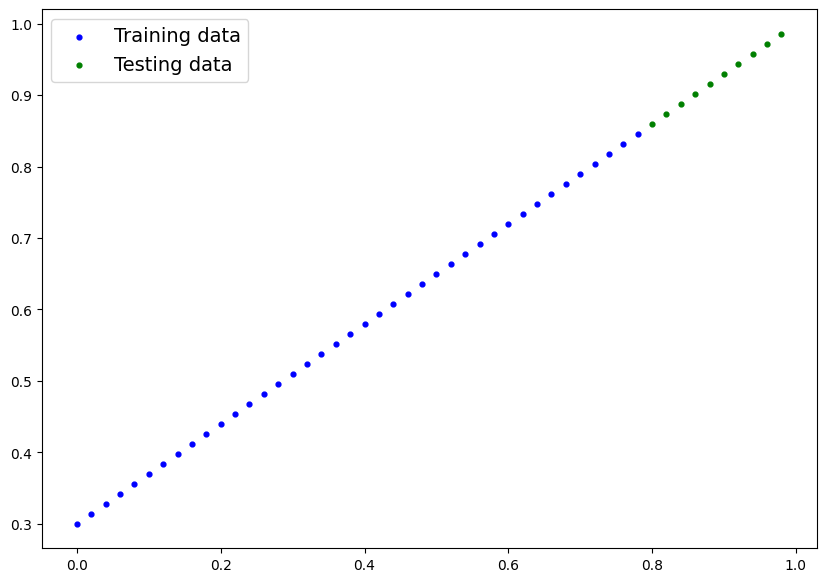

In [ ]:
#Plot the data
# NOte: if you don't have the plot_predictions() loaded, this will error

plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building PyTorch linear model


In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transformation, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# CHeck the model current device

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### 6.3 Training

For training we need:

* Loss Function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss functions
loss_fn = nn.L1Loss()  # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [ ]:
# Training loop
torch.manual_seed(42)

epochs = 200

epoch_count1 = []
loss_count1 = []
test_loss_values1 = []


# Device agnostic code (Putting data on the target data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grads
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count1.append(epoch)
    loss_count1.append(loss)
    test_loss_values1.append(test_loss)
    print(f"Epoch = {epoch} | Loss: {loss} | | Test loss: {test_loss}")


Epoch = 0 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 10 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 20 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 30 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 40 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 50 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 60 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 70 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 80 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 90 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 100 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 110 | Loss: 0.0012645035749301314 | | Test loss: 0.013801801018416882
Epoch = 120 | Loss: 0.0012645035749301314 | | Test loss: 0.0138018010184168

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evaluating predictions

In [ ]:
# turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

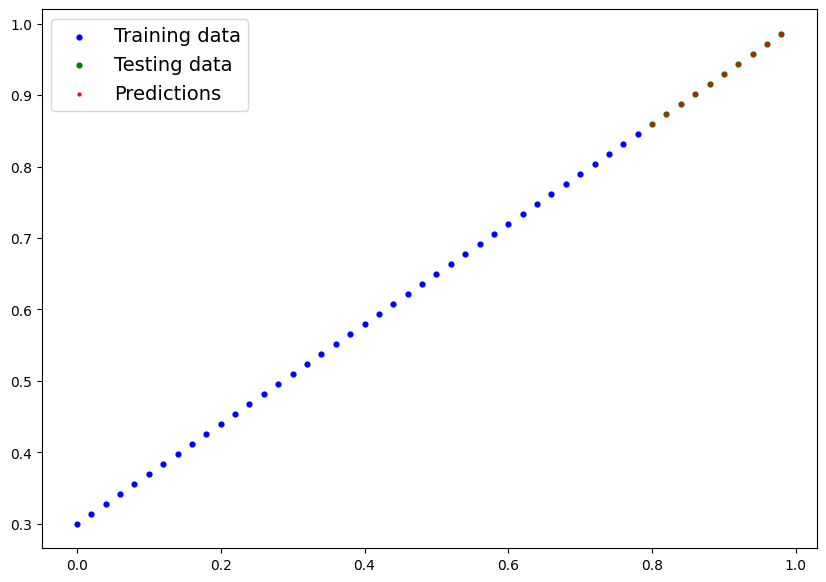

In [ ]:
# Check out model predictions

plot_predictions(predictions=y_preds.cpu())

### 6.5 saving and loading training model

In [ ]:
from pathlib import Path

#Creating a folder named "Model_1"
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Creating model save_path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# t. Save the model state dict()
print(f"Saving to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
# Load a PyTorch model
# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Evaluater

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## 7 Exercises and extra-curriculum

For Exercises and extra-curriculum activities:

### 7.1 Create a straight line dataset using the linear regression formula (weight * X + bias).

* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Creating weight, bias and 100 datapoints
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
# Making training/testing split

train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [ ]:
# Creating function to plot data

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=12, label= "Training data")

  plt.scatter(test_data, test_labels, c="g", s=12, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

  plt.legend(prop={"size":14});

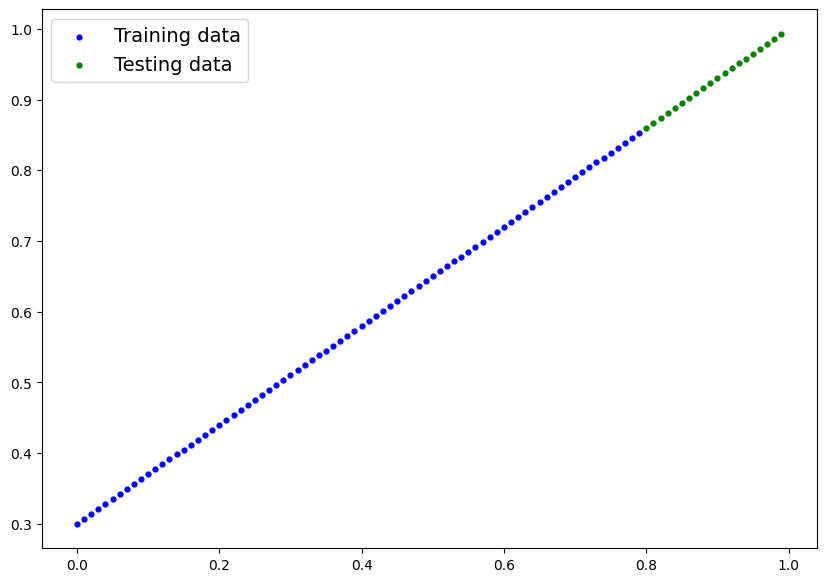

In [ ]:
# Plotting data:
plot_predictions()

In [ ]:
#Creating Linear Regression class
class LinearRegressionModelX(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                requires_grad=True,
                                dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                             requires_grad=True,
                             dtype=torch.float))

  # forward method
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

model_x = LinearRegressionModelX()

In [ ]:
#checking state_dict
model_x.state_dict()

OrderedDict([('weights', tensor([0.4997])), ('bias', tensor([0.6777]))])

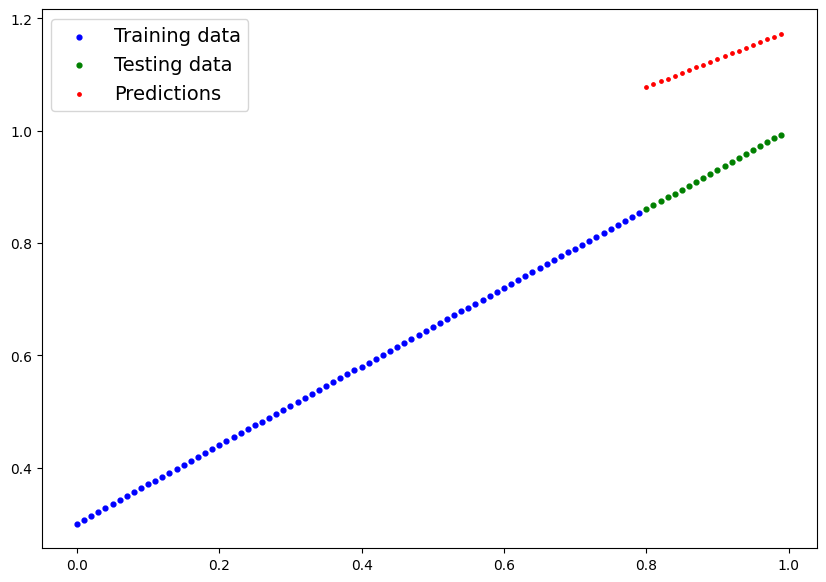

In [ ]:
with torch.inference_mode():
  y_preds = model_x(X_test)

plot_predictions(predictions=y_preds)

In [ ]:
#Creating loss function and optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_x.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

X_train.to(device)
y_train.to(device)
X_test.to(device)
y_test.to(device)

for epoch in range(epochs):
  model_x.train()
  y_pred = model_x(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 20 ==0:
    model_x.eval()
    with torch.inference_mode():
      test_pred = model_x(X_test)
      test_loss = loss_fn(test_pred, y_test)

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | MAE test Loss: {test_loss}")

Epoch: 0 | Loss: 0.2985721826553345 | MAE test Loss: 0.18490105867385864
Epoch: 20 | Loss: 0.07945291697978973 | MAE test Loss: 0.07288514077663422
Epoch: 40 | Loss: 0.05408366397023201 | MAE test Loss: 0.11852419376373291
Epoch: 60 | Loss: 0.04704166576266289 | MAE test Loss: 0.10808198153972626
Epoch: 80 | Loss: 0.0401875302195549 | MAE test Loss: 0.0927862897515297
Epoch: 100 | Loss: 0.03333349898457527 | MAE test Loss: 0.07749111950397491
Epoch: 120 | Loss: 0.02648044563829899 | MAE test Loss: 0.06185194104909897
Epoch: 140 | Loss: 0.0196293406188488 | MAE test Loss: 0.045524757355451584
Epoch: 160 | Loss: 0.012778239324688911 | MAE test Loss: 0.029197528958320618
Epoch: 180 | Loss: 0.005926154553890228 | MAE test Loss: 0.013214334845542908
Epoch: 200 | Loss: 0.0086985994130373 | MAE test Loss: 0.005444973707199097
Epoch: 220 | Loss: 0.0086985994130373 | MAE test Loss: 0.005444973707199097
Epoch: 240 | Loss: 0.0086985994130373 | MAE test Loss: 0.005444973707199097
Epoch: 260 | Loss

In [ ]:
#checking state_dict
model_x.state_dict()

OrderedDict([('weights', tensor([0.6988])), ('bias', tensor([0.3092]))])

In [ ]:
# Visualize the predictions
with torch.inference_mode():
  y_preds = model_x(X_test)
y_preds

tensor([[0.8682],
        [0.8752],
        [0.8822],
        [0.8892],
        [0.8962],
        [0.9031],
        [0.9101],
        [0.9171],
        [0.9241],
        [0.9311],
        [0.9381],
        [0.9451],
        [0.9521],
        [0.9590],
        [0.9660],
        [0.9730],
        [0.9800],
        [0.9870],
        [0.9940],
        [1.0010]])

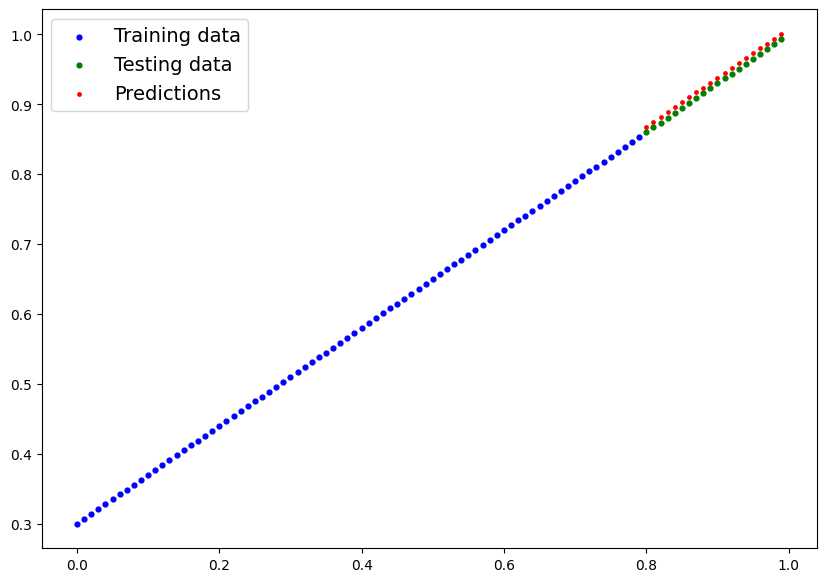

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
# Saving state_dict()
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_Exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving to: {MODEL_SAVE_PATH}")
torch.save(obj=model_x.state_dict(),
           f=MODEL_SAVE_PATH)


Saving to: models/01_Exercise.pth


In [ ]:
# Loading model
loaded_model_x = LinearRegressionModelX()

loaded_model_x.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_x.to(device)

next(loaded_model_x.parameters()).device

device(type='cpu')

In [ ]:
# Evaluating the loaded model

loaded_model_x.eval()
with torch.inference_mode():
  loaded_model_x_preds = loaded_model_x(X_test)

y_preds == loaded_model_x_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
y_preds.device

device(type='cpu')